In [2]:
from sympy import *
from sympy import I

In [3]:
q, eps_AA, eps_BB, eps_AB, eps_BA = symbols('q varepsilon_AA varepsilon_BB varepsilon_AB varepsilon_BA', real=True)
D = Symbol('D', positive=True)
lamb = Symbol('lambda')

In [4]:
M = Matrix([[0, q*I, 0, 0], [eps_AA, D, eps_AB, 0], [0, 0, 0, q*I], [eps_BA, 0, eps_BB, D]])
M

Matrix([
[            0, I*q,             0,   0],
[varepsilon_AA,   D, varepsilon_AB,   0],
[            0,   0,             0, I*q],
[varepsilon_BA,   0, varepsilon_BB,   D]])

In [5]:
M_lambda = M - lamb * eye(4)
M_lambda

Matrix([
[      -lambda,        I*q,             0,          0],
[varepsilon_AA, D - lambda, varepsilon_AB,          0],
[            0,          0,       -lambda,        I*q],
[varepsilon_BA,          0, varepsilon_BB, D - lambda]])

In [6]:
det = M_lambda.det()
det

D**2*lambda**2 - 2*D*lambda**3 + I*D*lambda*q*varepsilon_AA + I*D*lambda*q*varepsilon_BB + lambda**4 - I*lambda**2*q*varepsilon_AA - I*lambda**2*q*varepsilon_BB - q**2*varepsilon_AA*varepsilon_BB + q**2*varepsilon_AB*varepsilon_BA

In [7]:
eta_AA, eta_AB, eta_BA, eta_BB = symbols('eta_AA eta_AB eta_BA eta_BB', real=True)
det1 = det.subs([(eps_AA, I * q  * (1+eta_AA)/2), (eps_BB, I * q * (1+eta_BB)/2), (eps_AB, I * q * eta_AB/2), (eps_BA, I * q * eta_BA/2)])
det1

D**2*lambda**2 - 2*D*lambda**3 - D*lambda*q**2*(eta_AA + 1)/2 - D*lambda*q**2*(eta_BB + 1)/2 - eta_AB*eta_BA*q**4/4 + lambda**4 + lambda**2*q**2*(eta_AA + 1)/2 + lambda**2*q**2*(eta_BB + 1)/2 + q**4*(eta_AA + 1)*(eta_BB + 1)/4

In [8]:
eta = Symbol('eta', real=True)
alpha = Symbol('alpha', positive=True)
det2 = det1.subs([(eta_AA, eta), (eta_BB, eta), (eta_AB, eta+alpha), (eta_BA, eta-alpha)])
det2

D**2*lambda**2 - 2*D*lambda**3 - D*lambda*q**2*(eta + 1) + lambda**4 + lambda**2*q**2*(eta + 1) - q**4*(-alpha + eta)*(alpha + eta)/4 + q**4*(eta + 1)**2/4

In [9]:
det3 = det2.subs(eta, 0)
det3

D**2*lambda**2 - 2*D*lambda**3 - D*lambda*q**2 + alpha**2*q**4/4 + lambda**4 + lambda**2*q**2 + q**4/4

In [10]:
root = solve(det3, lamb)
print("find %d roots" % len(root))
root[0]

find 4 roots


D/2 - sqrt(D**2 - 2*I*alpha*q**2 - 2*q**2)/2

In [11]:
root[1]

D/2 + sqrt(D**2 - 2*I*alpha*q**2 - 2*q**2)/2

In [12]:
root[2]

D/2 - sqrt(D**2 + 2*I*alpha*q**2 - 2*q**2)/2

In [13]:
root[3]

D/2 + sqrt(D**2 + 2*I*alpha*q**2 - 2*q**2)/2

In [14]:
re(root[0])

D/2 - (4*alpha**2*q**4 + (D**2 - 2*q**2)**2)**(1/4)*cos(atan2(-2*alpha*q**2, D**2 - 2*q**2)/2)/2

In [15]:
re(root[1])

D/2 + (4*alpha**2*q**4 + (D**2 - 2*q**2)**2)**(1/4)*cos(atan2(-2*alpha*q**2, D**2 - 2*q**2)/2)/2

In [16]:
re(root[2])

D/2 - (4*alpha**2*q**4 + (D**2 - 2*q**2)**2)**(1/4)*cos(atan2(2*alpha*q**2, D**2 - 2*q**2)/2)/2

In [17]:
re(root[3])

D/2 + (4*alpha**2*q**4 + (D**2 - 2*q**2)**2)**(1/4)*cos(atan2(2*alpha*q**2, D**2 - 2*q**2)/2)/2

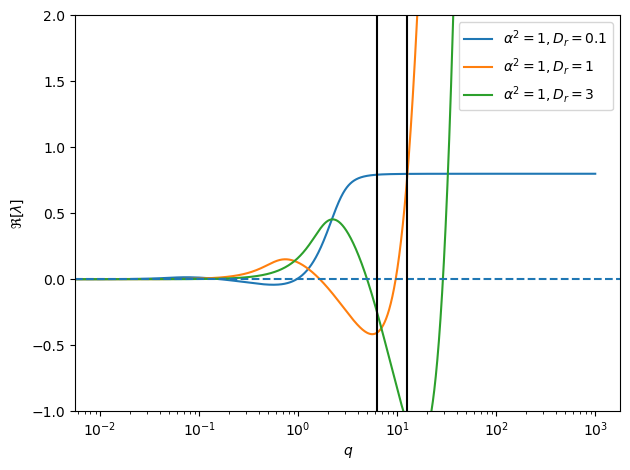

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def cal_lambda_re(D, alpha, q):
    A = 2 * alpha * q**2
    B = D**2 - 2 * q**2
    
    C = (A**2 + B**2) ** 0.25
    x_p = np.cos(np.arctan2(A, B) * 0.5)
    x_m= np.cos(np.arctan2(-A, B) * 0.5)

    lambda1 = 0.5 * (D - C * x_m)
    lambda2 = 0.5 * (D + C * x_m)
    lambda3 = 0.5 * (D - C * x_p)
    lambda4 = 0.5 * (D + C * x_p)
    
    return [lambda1, lambda2, lambda3, lambda4]

q = np.linspace(0, 1000, 100000)
for Dr in [0.1, 1, 3]:
    D = Dr + q ** 2 / (16 * Dr)
    # D = Dr
    # D = 1
    for alpha_2 in [1]:
        alpha = np.sqrt(alpha_2)
        y = cal_lambda_re(D, alpha, q)
        plt.plot(q, y[0], label=r"$\alpha^2=%g, D_r=%g$" % (alpha_2, Dr))
        # plt.plot(q, y[1])
        # plt.plot(q, y[2])
        # plt.plot(q, y[3])
plt.xscale("log")
plt.axhline(0, linestyle="dashed")
plt.xlabel(r"$q$")
plt.ylabel(r"$\Re[ {\lambda}]$")
plt.ylim(-1, 2)
plt.axvline(2*np.pi, c="k")
plt.axvline(2*np.pi * 2, c="k")

plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Setting $\eta_{AA}=\eta_{BB}=\eta$, $\eta_{AB}=-\eta_{BA}=\alpha$, the determinant becomes:
$$|M-\lambda I|=\left [\lambda^2 - D\lambda + \frac{1+\eta^2}{2}q^2\right ]^2 + \frac{\alpha^2q^4}{4},$$
where $D=\frac{D_r}{v_0}+\frac{v_0}{16D_r} q^2$.
To make $|M-\lambda I|=0$, $\lambda$ should obey:
$$\lambda^2 - D\lambda + \frac{1+\eta \pm i \alpha}{2} q^2 =0,$$
which leads to
$$\lambda_{\pm\pm}=\frac{D\pm\sqrt{D^2-2(1+\eta\pm i\alpha)q^2}}{2}$$

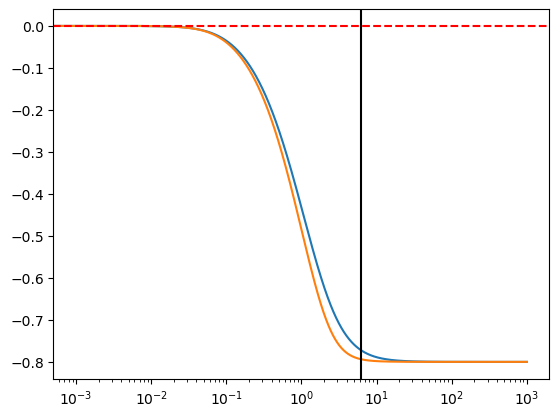

In [19]:
def cal_lambda(alpha, Dr, eta, q):
    q2 = q ** 2
    D = Dr + q2 / (16 * Dr)
    D2 = D ** 2
    Delta_p = D2 - 2 * (1 + eta + alpha * 1j) * q2
    Delta_m = D2 - 2 * (1 + eta - alpha * 1j) * q2
    sqrt_Delta_p = np.sqrt(Delta_p)
    sqrt_Delta_m = np.sqrt(Delta_m)
    root_pp = 0.5 * (D + sqrt_Delta_p)
    root_pm = 0.5 * (D + sqrt_Delta_m)
    root_mp = 0.5 * (D - sqrt_Delta_p)
    root_mm = 0.5 * (D - sqrt_Delta_m)
    return np.array([root_pp, root_pm, root_mp, root_mm])


q = np.linspace(0, 1000, 1000000)
Dr = 0.1
eta = -2
for alpha in [0.1, 1]:
    roots = cal_lambda(alpha, Dr, eta, q)
    D = Dr + q ** 2 / (16 * Dr)
    # plt.plot(q, roots[0].real)
    plt.plot(q, roots[2].real)

# y = cal_lambda_re(D, alpha, q)
# plt.plot(q, y[0])
plt.axvline(2*np.pi, c="k")

# plt.ylim(-0.05, 0.05)
plt.xscale("log")
plt.axhline(0, linestyle="dashed", c="r")
plt.show()
plt.close()